In [53]:
#Este notebook carga el dataset MNIST, imprime algunos ejemplos, y despues extrae sólo dos clases indicadas (ejemplo: 0, 1)
#para realizar clasificación binaria.
#Tareas:
#- Diseña un MLP y entrenalo para realizar clasificación binaria.
#- Juega con distintas arquitrecturas para ver con cuál obtienes menor pérdida.
#  desde un perceptron sigmoide, hasta una red de 4 o 5 capas intermedias (con diferentes cantidades de unidades).
#- Evalua el desempeño con diferentes learning rates, tamaño de batches, y número de épocas.
#- Elige otras dos clases y repite el proceso (ejemplo, clases 3 vs 8, o 4 vs 9)

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


Examples of the MNIST dataset (test set):


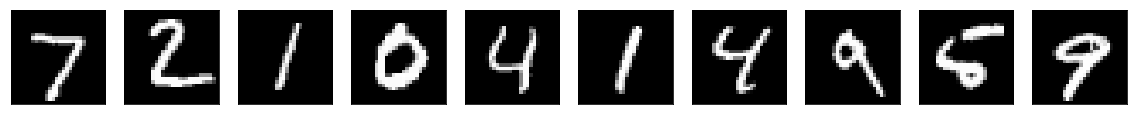

In [3]:
# Show some examples of the MNIST dataset (the first 10 instances)
print("Examples of the MNIST dataset (test set):")
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

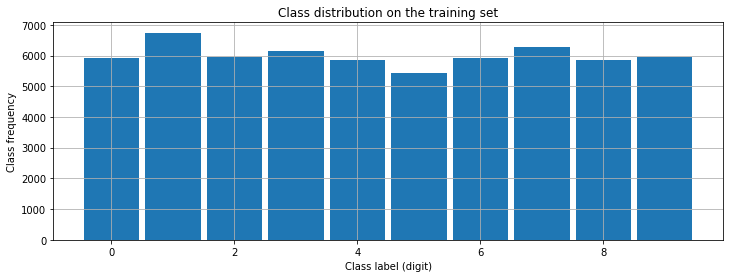

In [4]:
# Print frequencies of each class, i.e., number of instances per class
plt.figure(figsize=(12, 4))
plt.hist(y_train, np.linspace(-0.5, 9.5, 11), rwidth=0.9)
plt.title("Class distribution on the training set")
plt.xlabel("Class label (digit)")
plt.ylabel("Class frequency")
plt.grid()
# you will see that the dataset is more or less well balanced

In [5]:
# Extract only two classes, e.g., classes 0 and 1
class0 = 0 # Try with other class by modifying this parameter
class1 = 1 # Try with other class by modifying this parameter

# Training set
training_indices = np.logical_or(y_train == class0, y_train == class1) # identify indices of selected classes
X_training = x_train[training_indices] # Copy features of identified elements
Y_training = y_train[training_indices] # Copy labels of identified elements
Y_training[Y_training == class0] = 0 # Assign value of 0 to one class
Y_training[Y_training == class1] = 1 # and value of 1 to the other one.
print("Size of training set")
print(X_training.shape)
print(Y_training.shape)

# Test set
training_indices = np.logical_or(y_test == class0, y_test == class1) # identify indices of selected classes
X_testing = x_test[training_indices] # Copy features of identified elements
Y_testing = y_test[training_indices] # Copy labels of identified elements
Y_testing[Y_testing == class0] = 0 # Assign value of 0 to one class
Y_testing[Y_testing == class1] = 1 # and value of 1 to the other one.
print("Size of test set")
print(X_testing.shape)
print(Y_testing.shape)

Size of training set
(12665, 784)
(12665,)
Size of test set
(2115, 784)
(2115,)


In [6]:
# Build your model architecture (layers with activations), and print summary
model = Sequential()
model.add(Dense(100, input_dim=X_training.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 79,521
Trainable params: 79,521
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile your model (define optimizer and loss function)
model.compile(optimizer='sgd', loss='mean_squared_error')

In [8]:
# Train your model
hist = model.fit(X_training, Y_training, epochs=10, batch_size=100)

Epoch 1/10
12665/12665 [==============================] - 1s 60us/step - loss: 0.1893
Epoch 2/10
12665/12665 [==============================] - 0s 37us/step - loss: 0.1224
Epoch 3/10
12665/12665 [==============================] - 1s 41us/step - loss: 0.0804
Epoch 4/10
12665/12665 [==============================] - 1s 55us/step - loss: 0.0418
Epoch 5/10
12665/12665 [==============================] - 1s 43us/step - loss: 0.0225
Epoch 6/10
12665/12665 [==============================] - 0s 37us/step - loss: 0.0144
Epoch 7/10
12665/12665 [==============================] - 1s 41us/step - loss: 0.0105
Epoch 8/10
12665/12665 [==============================] - 1s 44us/step - loss: 0.0083
Epoch 9/10
12665/12665 [==============================] - 0s 35us/step - loss: 0.0069
Epoch 10/10
12665/12665 [==============================] - 0s 38us/step - loss: 0.0060


Text(0,0.5,'Loss')

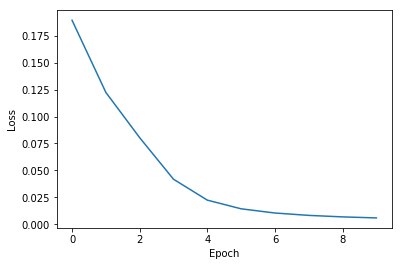

In [9]:
# Plot training history
plt.plot(hist.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [10]:
# Make predictions for test set
y_hat = model.predict(X_testing)

Text(0.5,1,'Prediction')

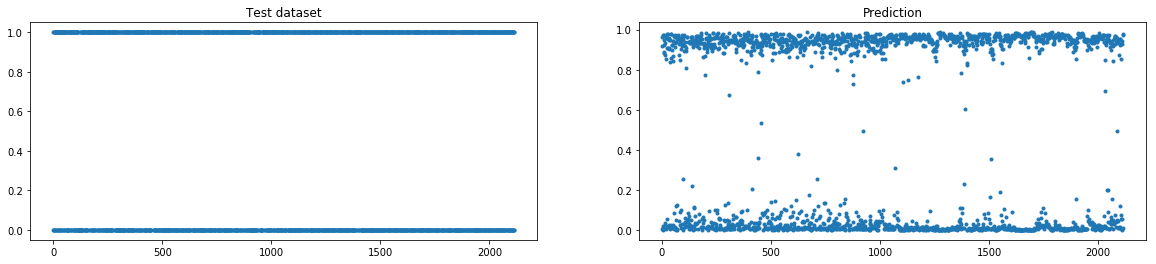

In [11]:
# Plot info about classes: test set and prediction
plt.figure(figsize=(20, 4))
ax = plt.subplot(1, 2, 1)
ax.plot(Y_testing, '.')
ax.set_title("Test dataset")
ax = plt.subplot(1, 2, 2)
ax.plot(y_hat, '.')
ax.set_title("Prediction")

In [12]:
# Evaluate the prediction error on the test set (data not seen during training. Good to see how well our will generalize)
test_error = model.evaluate(X_testing, Y_testing)
print("Test error: {}".format(test_error))

2115/2115 [==============================] - 0s 100us/step
Test error: 0.004284463972998144


In [20]:
Ws = model.layers[0].get_weights()[0]
bs = model.layers[0].get_weights()[1]
print(Ws.shape)
print(bs.shape)

(784, 100)
(100,)
